# 논문 톺아보기

https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf

이미지의 출처는 논문입니다.

object detection은 물체가 무엇인지 분류하고 어디에 위치하는지 알아내는 기술입니다. 



## Abstract

[논문 전 object detection]


Detection을 하기 위해서 분류기를 재설정합니다.


[논문 object detection]


논문에서 말하는 object detection의 특징은 separated bounding boxes and associated class probabilities을 갖고 있습니다.


A single network는 전체 이미지에서 클래스의 확률과 바운딩박스들을 한 번의 평가로 직접적으로 예측이 가능합니다.


Detection의 파이프라인은 a single network이며, 이것은 최적화가 가능하고 검출을 할 때 end to end 기법을 이용합니다.


[논문 기술(YOLO) 특징]


- Unified architecture is fast


- YOLO모델은 이미지를 1초에 45프레임으로 진행합니다.


- Smaller version, 1초에 155프레임으로 진행합니다.


- Localization errors가 높은 편입니다.


- False positives on backgroud를 에측할 때 수치는 낮
다.


- 물체의 일반적인 특징으터 배웁니다.


- 수행 능력이 단연 갑입니다.



## Introduction


0. Object detection

>object detection은 물체가 무엇인지 분류(classification) 하고 어디에 위치하는지 알아내는 기술(localization)을 동시에 진행합니다. 

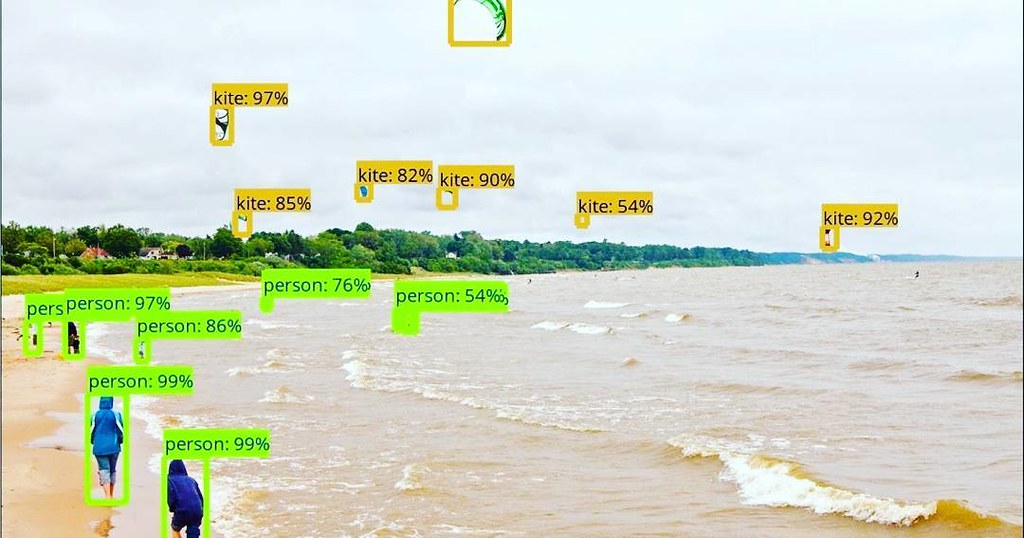

<br>


1. DPM, R-CNN


- 2-stage Detector

   - classification 과 localization을 순차적 진행함.
   
   - 느리고 최적화가 어려움

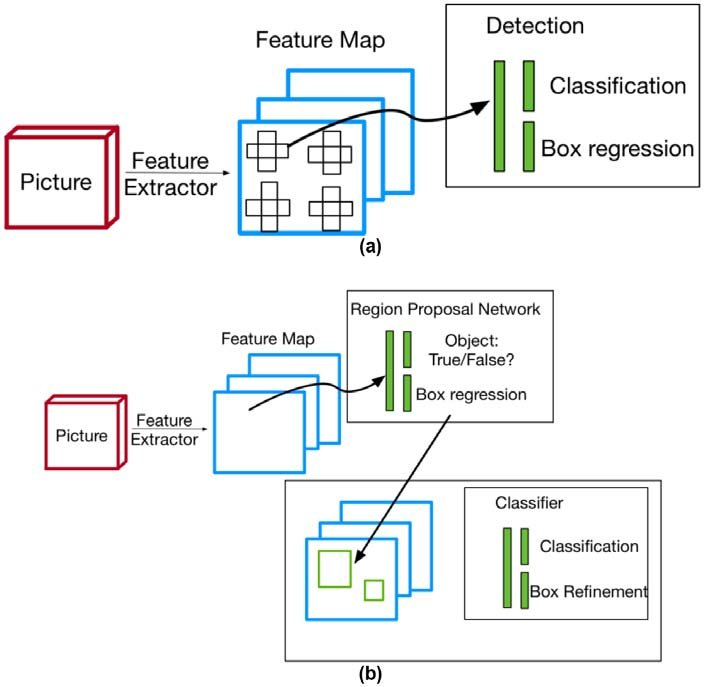


2. YOLO

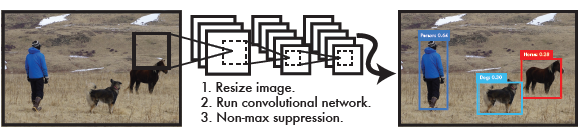


- 2-stage detector의 문제 해결

   - 빠르다,(45fps~150fps)
   
   - Classification 과 localization이 동시에 진행

   - Single convolutional network
   
   - Bounding box좌표와 class로 확률 계산
   
   
- 전체적인 이미지를 보고 추론하기에 객체 인식 오류가 적음

- 새로운 도메인에 적용하기 쉽게 일반화된 표현 학습

- regression관점으로 본다

   
<br>

---

## Unified Detection

1. YOLO Model

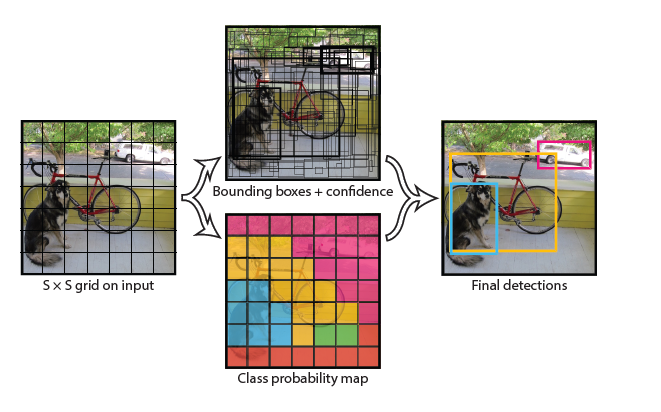


- SxS grid on input

   - 이미지의 크기(S=7)
   
   - Grid cell 중심을 가지는 bounding box들이 존재
   
- Bounding boxes + confidence

   - Bounding box작업

   - 각 grid마다 담당하는 bounding box가 2개 
   
   - Box의 중심좌표:x,y 
   
   - Box의 높이,너비 : h,w
   
   - Confidence score
   
   > 객체가 존재하면 IOU, 아니면 0 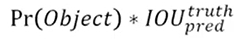


- Class probability map

> 박스들과 별도로 각 grid마다 class 확률 계산 후 가장 높은 확률의 class가 정해집니다.(grid관련 작업) 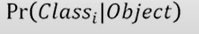



- Find detections

>위의 두 작업을 통해서 객체를 분류하고 위치를 색깔별로 바운딩 박스하여서 결과를 나타냅니다.

<br>

2. Network Design

- GoogLeNet기반

   
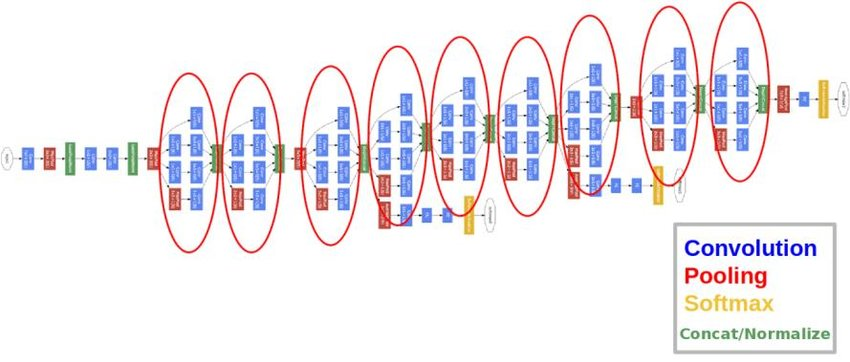



*아래의 module을 사용하지 않고 1x1 reduction layer로 대체

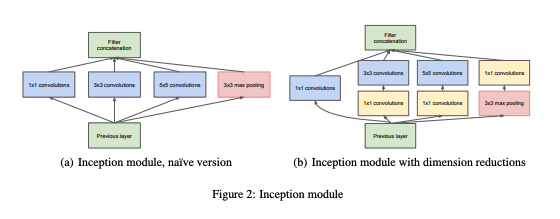

*YOLO의 네트워크 디자인

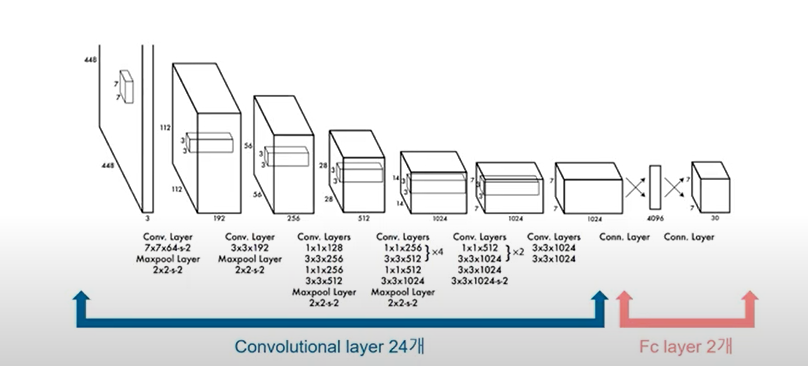   
   
<br>

3. Training

*첫 화살표 전은 Feature extract이고 이후는 Object detection

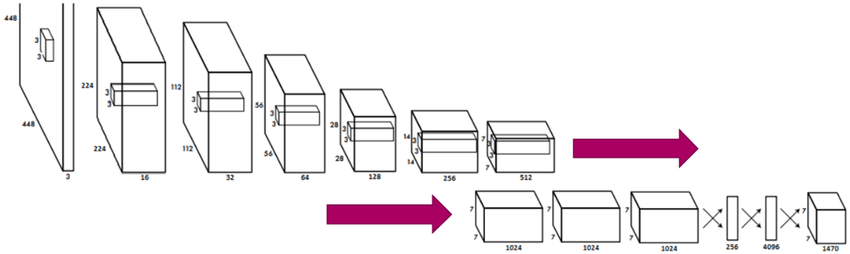


3-1) Feature Extract

- Conv layer 20개는 ImageNet으로 사전학습(pretrain)이 됨

3-2) Object detection


- pretrain이 된 모델이 레이어를 추가하면 성능이 좋아짐

- Conv layer 4개 , FC layer 2개를 추가합니다(가중치는 random 초기화)

- Input size 증가(224->448)를 통해 해상도 향상

- 모든 레이어는 leaky ReLU(except last layer)


3-3)그림과 함께 보는 예시

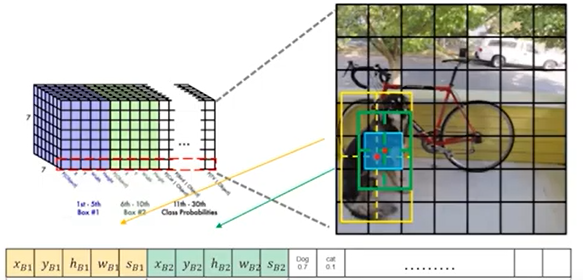

Box의 정규화가 된 x,y,h,w사용하기

- 전체 이미지에 대해 정규화(w,h)

- Grid에 대해 정규화(x,y)

<br>

4. Loss function

<br>

4-1) Bounding box coordinate regession


*식

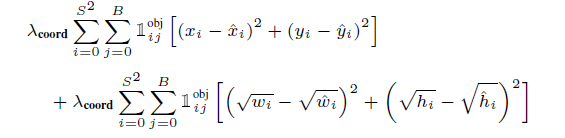


*i번째 그리디, j번째 박스에 물체가 있는 경우

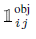

*localization에 가중치를 주기 위한 loss term

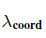

*크기에 따른 error를 줄이기 위해 높이, 너비에 대해 루트 값을 주어 크기를 줄여줌

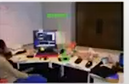

<br>

4-2) Confidence score prediction

*식

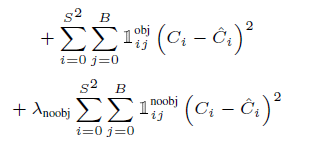

*i번째 그리드, j번째 box 내 물체가 있는 경우

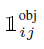

*i번째 그리드, j번째 bpx 내 물체가 없는 경우

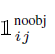

*0.5일 시, 객체가 없는 no object box가 더 많이 존재하고 noobj와 obj의 균형을 맞춰주는 용도

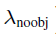


*Object의 유무에 따라 confidence score값에 다름

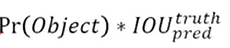


<br>

4-3) Class score prediction

- 물체가 없는 경우(background로 간주)

*식

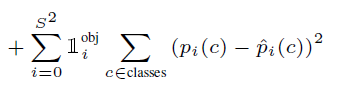

*i번째 그리디 내 물체가 있는 경우



<br>

5. Hyperparameter

- epochs = 135

- batch_size= 64

- momentum=0.9

- decay = 0.0005

- Learning rate = [0.001,0.01,0.01,0.001]

   - 1~75 epoch: 0.001 -> 0.01 유지
   
   - 76~105 epoch: 0.001 유지
   
   - 106~135 epoch: 0.0001 유지
   
   
- Overfitting by dropout, augmentation

- dropout rate = 0.5

- data augmentation

   - 원본의 20% scaling,translation
   
   - 무작위하게 exposure, saturation * 1.5 in HSV
   
   
<br>

6. Test

>bounding box의 class가 나타날 확률과 얼마나 잘 위치하고 있는지를 Class-specific confidence score를 사용하여 나타낸다.


*식

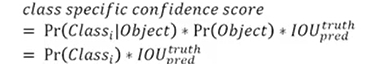

*그림으로 보는 과정

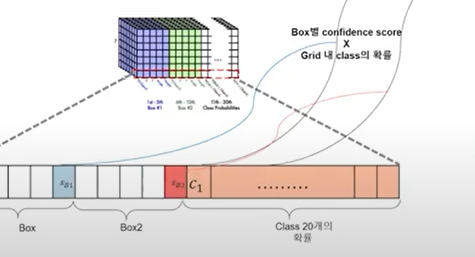

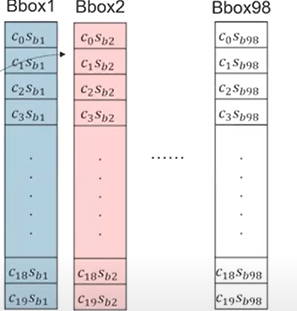

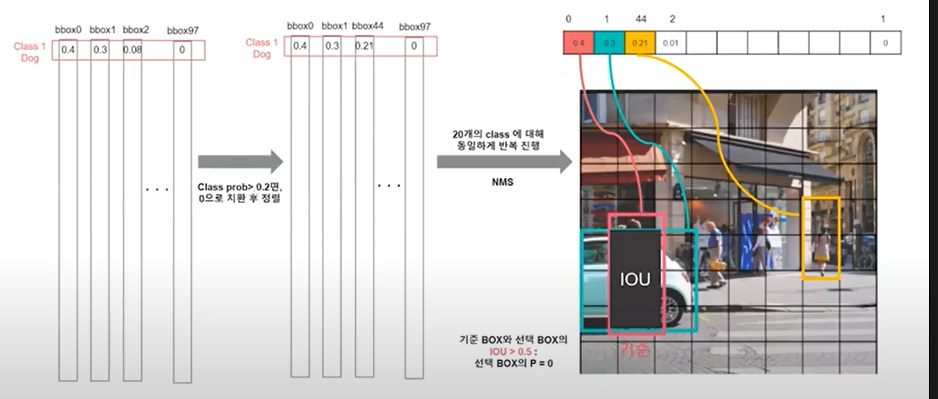


<br>

7. Limitation


7-1) Bounding box의 형태가 예상치 못한 모양으로 새롭거나 독특하면 예측을 잘 못합니다.

7-2) 각 grid cell은 하나의 클래스밖에 예측 못함

- 물체가 겹치면 제대로 예측 불가

- 크기가 작으면 제대로 인식 불가

7-3) Bounding box의 크기와 상관 없이 error처리


- error가 작으면 큰 박스의 영향 X

- error가 작아도 작은 박스의 IoU에 영향 O


<br>

### Experiments

논문에서 나온 결과 와  기존의 실험 결과 비교

<br>

1. Comparision

*FPS:초당 프레임수 

*mAP: 물체 클래스가 여러 개인 경우 각 클래스의 AP를 구하고 합한 다음에 물체 클래스의 개수로 나눠줘서 알고리즘의 성능을 평가하는 지표

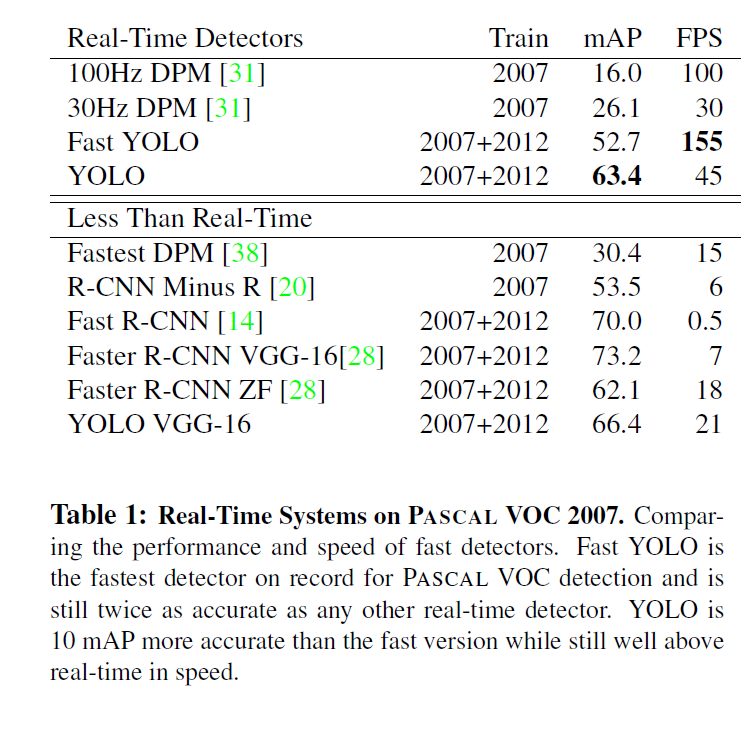


- DPM vs YOLO

   - 기존 DPM보다 빠르고 mAP가 3배 높다
   

- Faster R-CNN VS LOLO

   - mAP는 낮으나 FPS가 6배 높음
   
- GoogLeNet vs VGG-16

   - 같은 YOLO모델에 convnet을 vgg16으로 바꾼다
   
   - map가 3증가, FPS는 2배 차이

2. Error Analysis

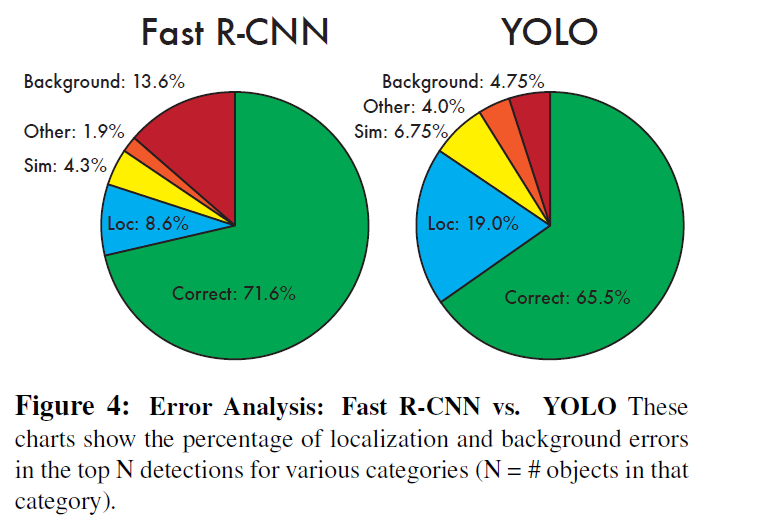


- 기준

   - Correct: class가 정확하고 IoU가 0.5보다 크다
   
   - Localization: class가 정확하고 0.1 < IoU < 0.5
   
   - Smilar: class가 유사하고 IoU > 0.1인 경우
   
   - Other: class가 틀리고 IoU > 0.1
   
   - Background: 어느 객체여도, IoU < 0.1
   

- Fast R-CNN: Background Error = error * 0.5

- YOLO: Background Error = Fast R-CNN * (1/3)

*위에서 말했다시피 YOLO의 error의 대부분은 localization이기에 background error의 비율이 낮음

<br>

3. Fast R-CNN + YOLO

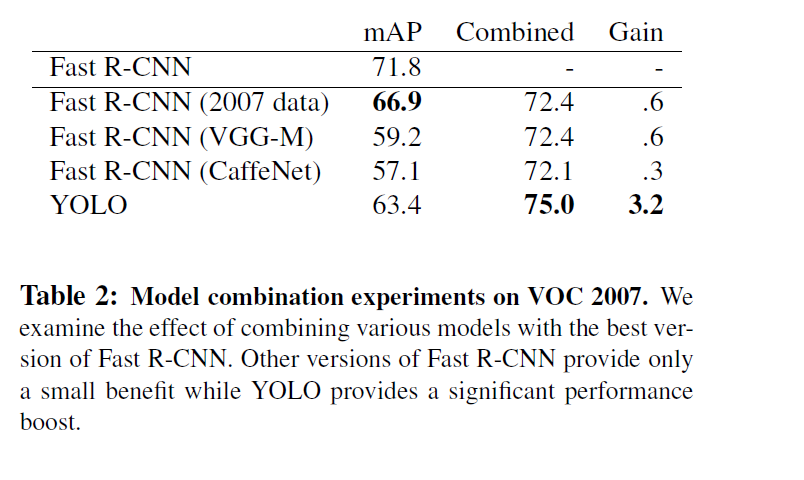


- Fast R-CNN: localization error 감소

- YOLO: background error 감소


- 두 장점을 합치면 mAP가 3.2%증가


<br>

4. Generalizability

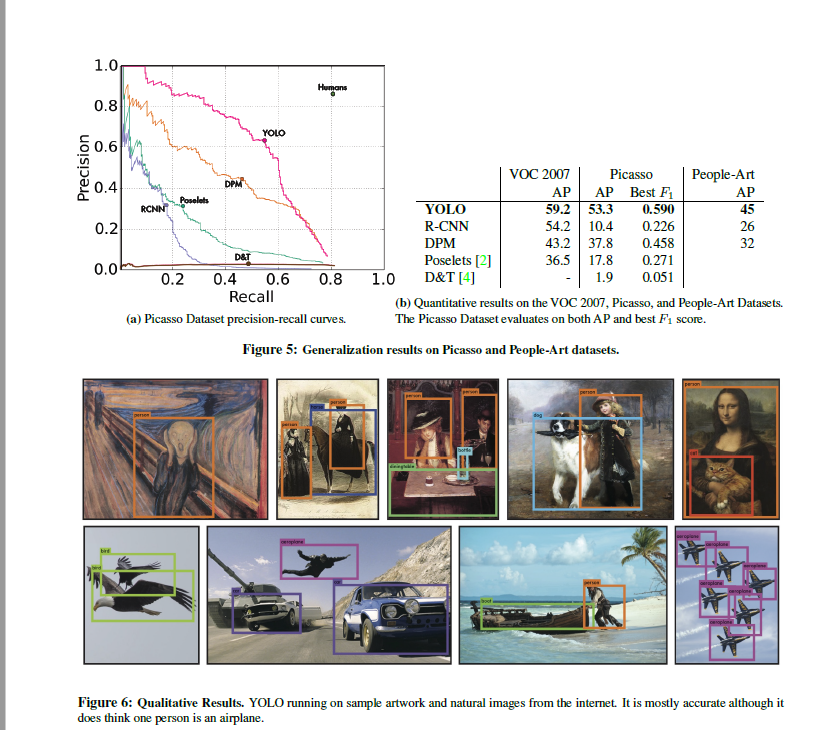

위의 그림과 같이, 사진뿐만 아니라 그림에서도 object detection이 가능합니다.